In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("Bitcoin prices.csv")

In [3]:
df

Date          Open          High           Low         Close  \
0     9/18/2014    456.859985    456.859985    413.104004    424.440002   
1     9/19/2014    424.102997    427.834991    384.532013    394.795990   
2     9/20/2014    394.673004    423.295990    389.882996    408.903992   
3     9/21/2014    408.084991    412.425995    393.181000    398.821014   
4     9/22/2014    399.100006    406.915985    397.130005    402.152008   
...         ...           ...           ...           ...           ...   
3120   4/4/2023  27795.273440  28433.742190  27681.304690  28168.089840   
3121   4/5/2023  28169.726560  28739.238280  27843.763670  28177.984380   
3122   4/6/2023  28175.226560  28178.384770  27738.759770  28044.140630   
3123   4/7/2023  28038.966800  28111.593750  27794.031250  27925.859380   
3124   4/8/2023  27923.234380  28158.269530  27887.365230  28032.187500   

         Adj Close        Volume  
0       424.440002  3.448320e+07  
1       394.795990  3.791970e+07  
2       408.903992  3.686360e+07  
3       398.821014  2.658010e+07  
4       402.152008  2.412760e+07  
...            ...           ...  
3120  28168.089840  1.528454e+10  
3121  28177.984380  1.705232e+10  
3122  28044.140630  1.383781e+10  
3123  27925.859380  1.086168e+10  
3124  28032.187500  9.243753e+09  

[3125 rows x 7 columns]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

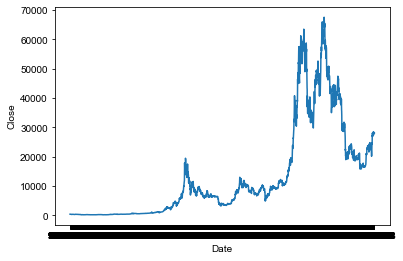

In [5]:
sns.lineplot(x=df['Date'],y=df['Close'])
sns.set(rc={'figure.figsize':(25,5)})

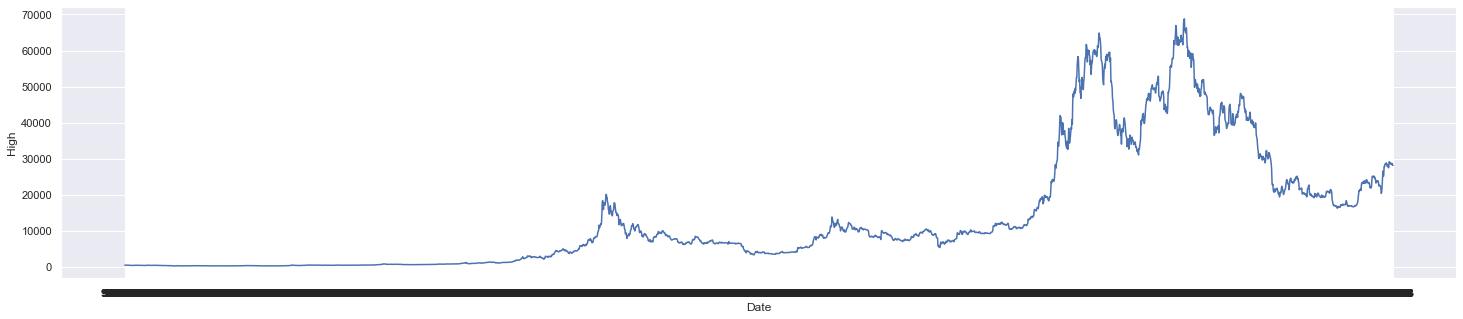

In [6]:
sns.lineplot(x=df['Date'],y=df['High'])
sns.set(rc={'figure.figsize':(25,5)})

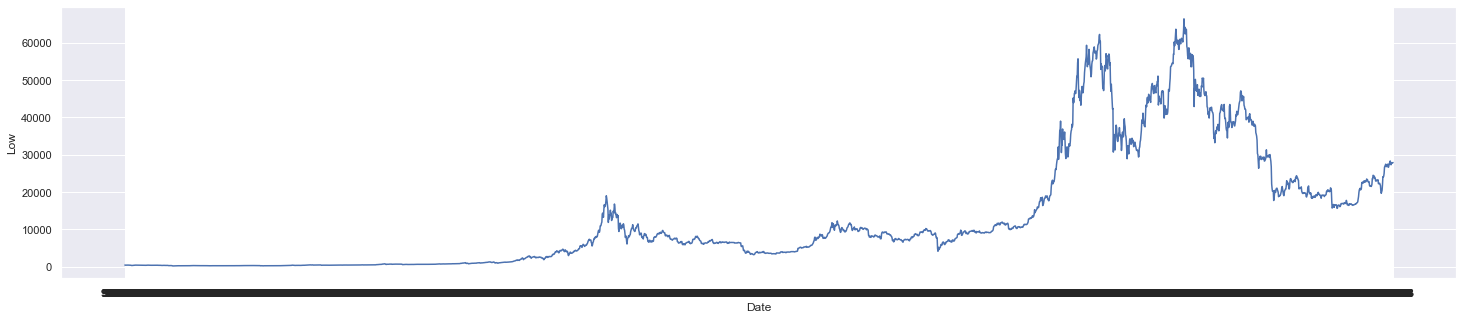

In [7]:
sns.lineplot(x=df['Date'],y=df['Low'])
sns.set(rc={'figure.figsize':(25,5)})

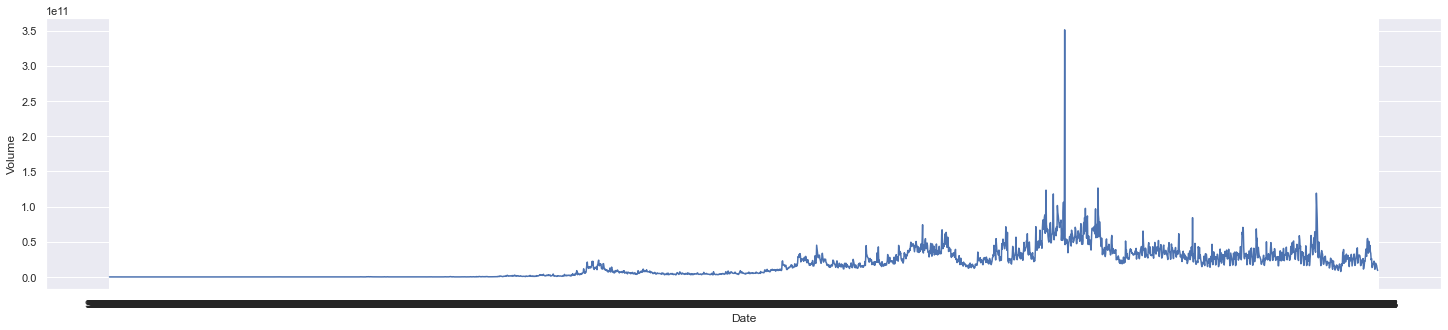

In [8]:
sns.lineplot(x=df['Date'],y=df['Volume'])
sns.set(rc={'figure.figsize':(25,5)})

## Yearly Analysis 

In [9]:
df['Date'].dtype

dtype('O')

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Date'].dtype

dtype('<M8[ns]')

In [12]:
df['Date'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
3120    2023
3121    2023
3122    2023
3123    2023
3124    2023
Name: Date, Length: 3125, dtype: int64

In [13]:
df['Date'].dt.year.min()
# df['Date'].dt.year.max()

2014

In [14]:
df['Date'].dt.year.max()

2023

In [15]:
spilt_data={}

for year in range(df['Date'].dt.year.min(),df['Date'].dt.year.max()+1):
    spilt_data[year]=df[df['Date'].dt.year==year]

In [16]:
spilt_data[2023]

Date         Open         High          Low        Close  \
3027 2023-01-01  16547.91406  16630.43945  16521.23438  16625.08008   
3028 2023-01-02  16625.50977  16759.34375  16572.22852  16688.47070   
3029 2023-01-03  16688.84766  16760.44727  16622.37109  16679.85742   
3030 2023-01-04  16680.20508  16964.58594  16667.76367  16863.23828   
3031 2023-01-05  16863.47266  16884.02148  16790.28320  16836.73633   
...         ...          ...          ...          ...          ...   
3120 2023-04-04  27795.27344  28433.74219  27681.30469  28168.08984   
3121 2023-04-05  28169.72656  28739.23828  27843.76367  28177.98438   
3122 2023-04-06  28175.22656  28178.38477  27738.75977  28044.14063   
3123 2023-04-07  28038.96680  28111.59375  27794.03125  27925.85938   
3124 2023-04-08  27923.23438  28158.26953  27887.36523  28032.18750   

        Adj Close        Volume  
3027  16625.08008  9.244362e+09  
3028  16688.47070  1.209778e+10  
3029  16679.85742  1.390308e+10  
3030  16863.23828  1.842174e+10  
3031  16836.73633  1.369276e+10  
...           ...           ...  
3120  28168.08984  1.528454e+10  
3121  28177.98438  1.705232e+10  
3122  28044.14063  1.383781e+10  
3123  27925.85938  1.086168e+10  
3124  28032.18750  9.243753e+09  

[98 rows x 7 columns]

In [17]:
year2014=spilt_data[2014]
year2015=spilt_data[2015]
year2016=spilt_data[2016]
year2017=spilt_data[2017]
year2018=spilt_data[2018]
year2019=spilt_data[2019]
year2020=spilt_data[2020]
year2021=spilt_data[2021]
year2022=spilt_data[2022]
year2023=spilt_data[2023]

In [18]:
print(spilt_data.keys())

dict_keys([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


In [19]:
print(df['Date'].dt.year.unique())

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [20]:
print(df[df['Date'].isnull()])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [21]:
year2023

Date         Open         High          Low        Close  \
3027 2023-01-01  16547.91406  16630.43945  16521.23438  16625.08008   
3028 2023-01-02  16625.50977  16759.34375  16572.22852  16688.47070   
3029 2023-01-03  16688.84766  16760.44727  16622.37109  16679.85742   
3030 2023-01-04  16680.20508  16964.58594  16667.76367  16863.23828   
3031 2023-01-05  16863.47266  16884.02148  16790.28320  16836.73633   
...         ...          ...          ...          ...          ...   
3120 2023-04-04  27795.27344  28433.74219  27681.30469  28168.08984   
3121 2023-04-05  28169.72656  28739.23828  27843.76367  28177.98438   
3122 2023-04-06  28175.22656  28178.38477  27738.75977  28044.14063   
3123 2023-04-07  28038.96680  28111.59375  27794.03125  27925.85938   
3124 2023-04-08  27923.23438  28158.26953  27887.36523  28032.18750   

        Adj Close        Volume  
3027  16625.08008  9.244362e+09  
3028  16688.47070  1.209778e+10  
3029  16679.85742  1.390308e+10  
3030  16863.23828  1.842174e+10  
3031  16836.73633  1.369276e+10  
...           ...           ...  
3120  28168.08984  1.528454e+10  
3121  28177.98438  1.705232e+10  
3122  28044.14063  1.383781e+10  
3123  27925.85938  1.086168e+10  
3124  28032.18750  9.243753e+09  

[98 rows x 7 columns]

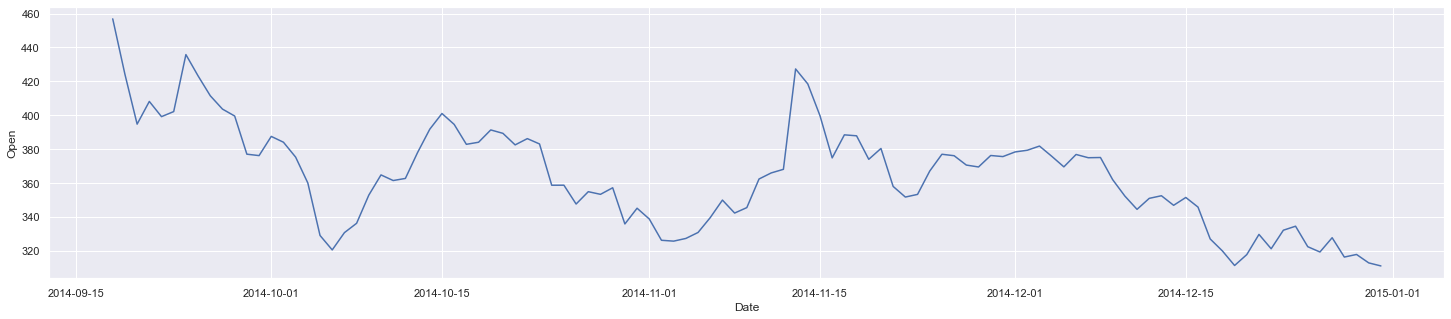

In [22]:
sns.lineplot(x=year2014['Date'],y=year2014['Open'])
sns.set(rc={'figure.figsize':(25,5)})

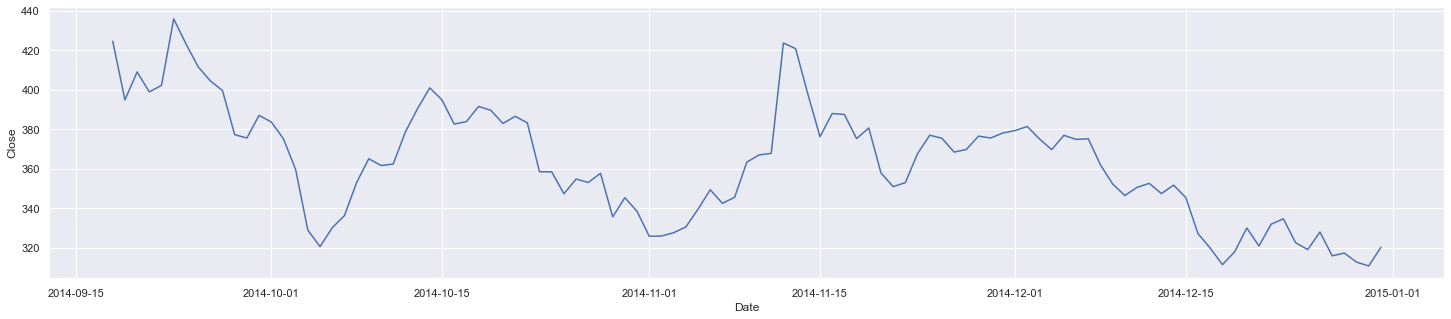

In [23]:
sns.lineplot(x=year2014['Date'],y=year2014['Close'])
sns.set(rc={'figure.figsize':(25,5)})

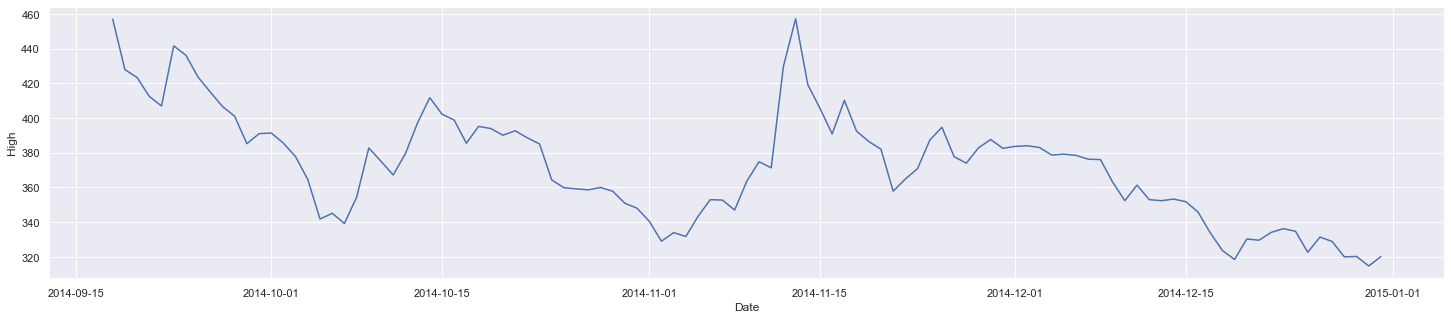

In [24]:
sns.lineplot(x=year2014['Date'],y=year2014['High'])
sns.set(rc={'figure.figsize':(25,5)})

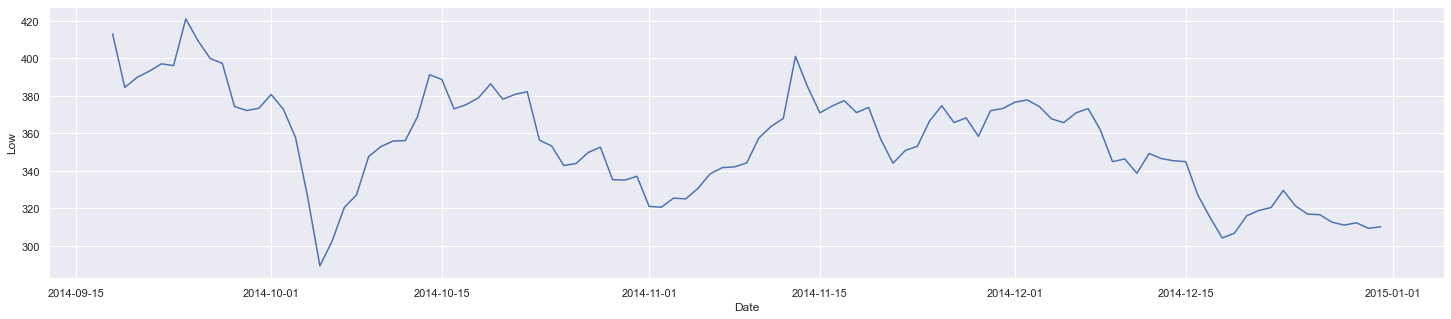

In [25]:
sns.lineplot(x=year2014['Date'],y=year2014['Low'])
sns.set(rc={'figure.figsize':(25,5)})

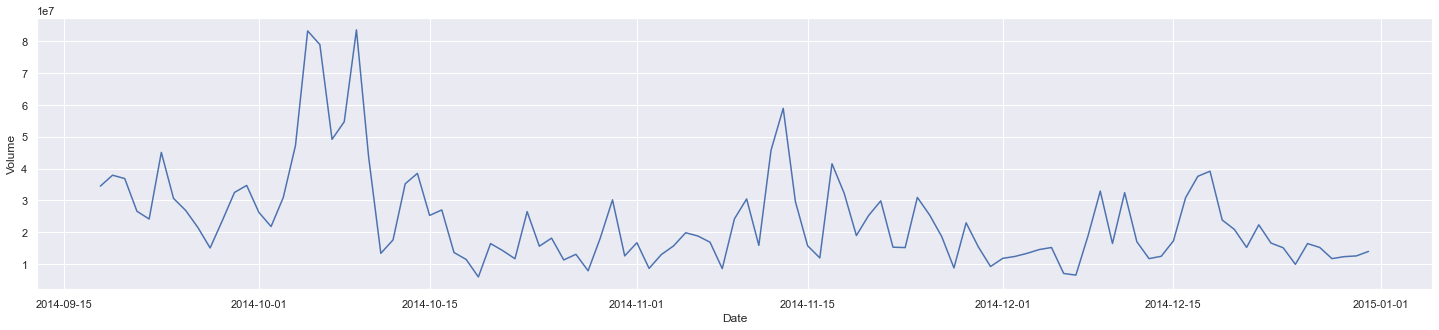

In [26]:
sns.lineplot(x=year2014['Date'],y=year2014['Volume'])
sns.set(rc={'figure.figsize':(25,5)})

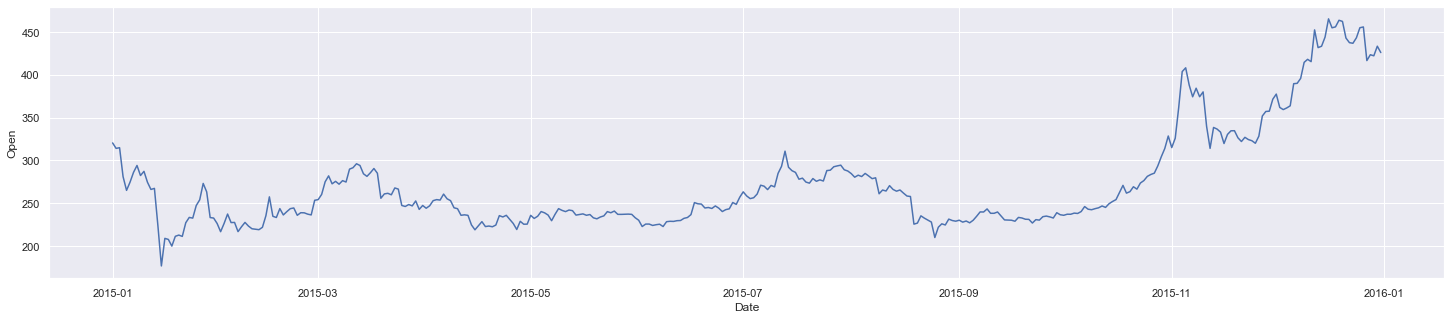

In [27]:
sns.lineplot(x=year2015['Date'],y=year2015['Open'])
sns.set(rc={'figure.figsize':(25,5)})

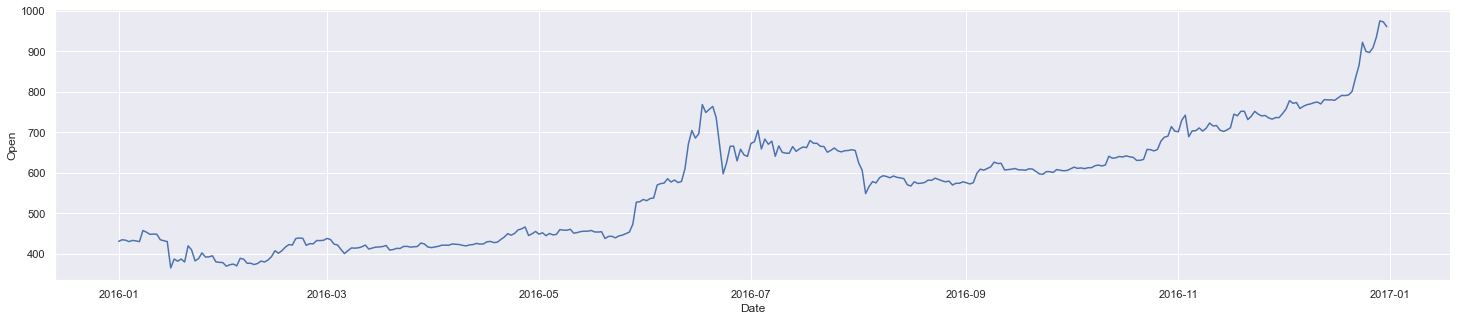

In [28]:
sns.lineplot(x=year2016['Date'],y=year2016['Open'])
sns.set(rc={'figure.figsize':(25,8)})

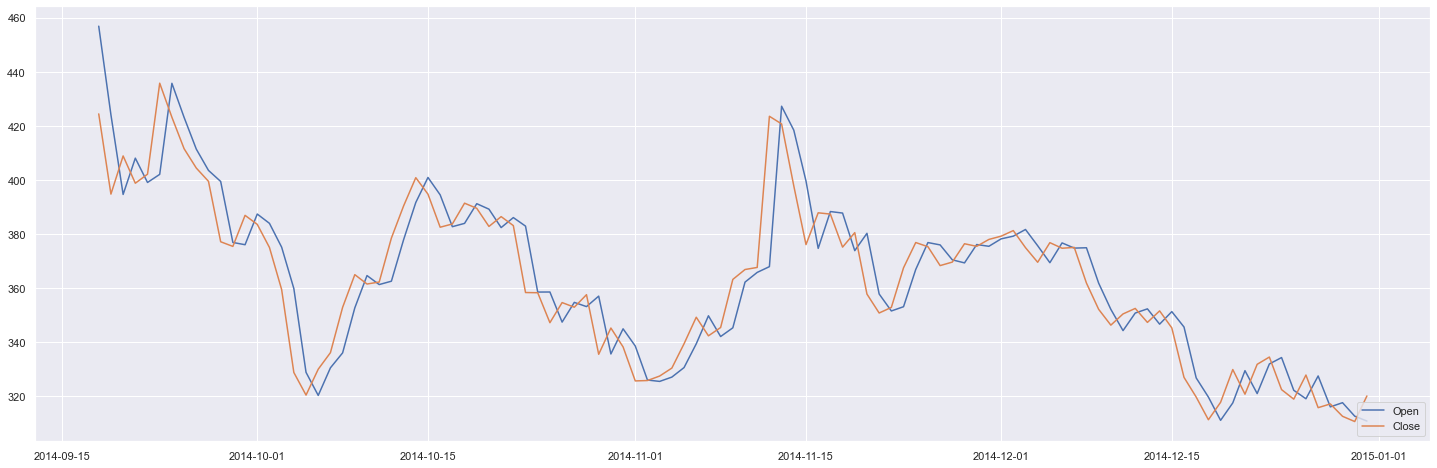

In [29]:
plt.plot(year2014['Date'],year2014[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

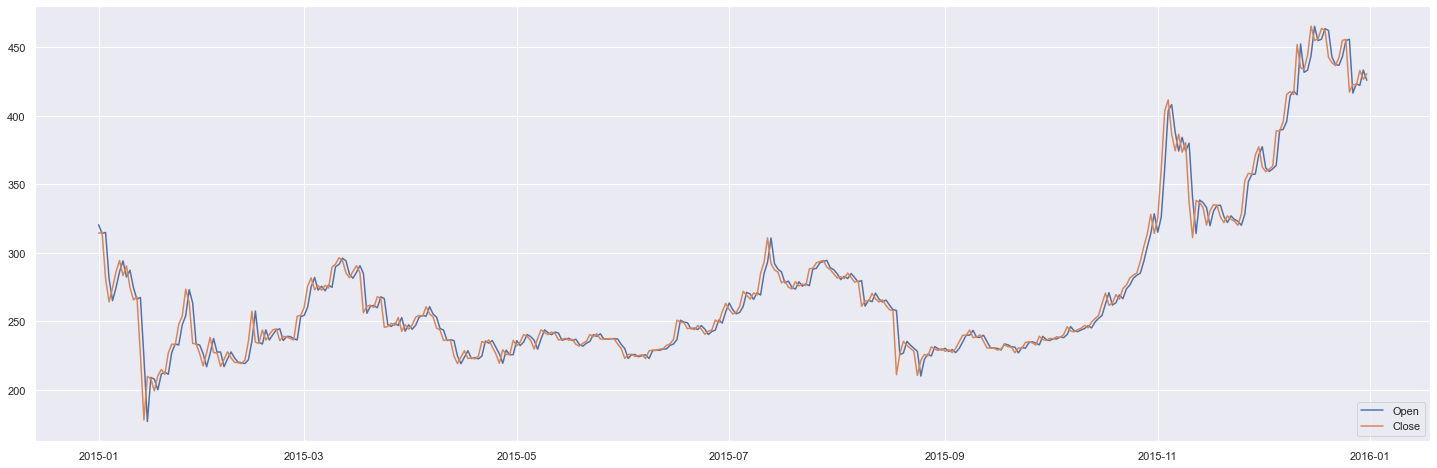

In [30]:
plt.plot(year2015['Date'],year2015[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

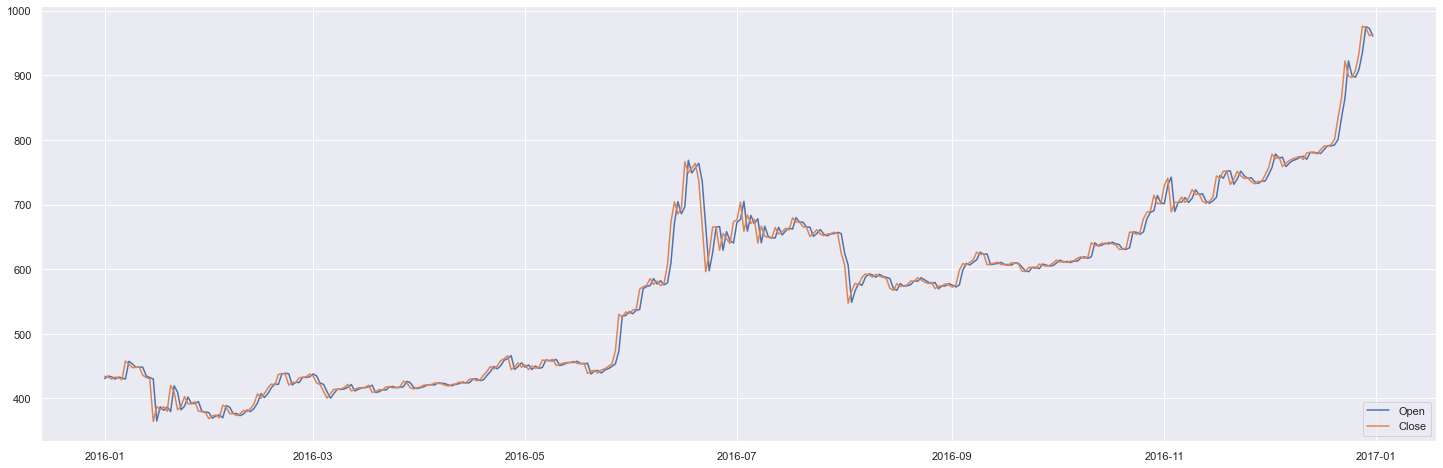

In [31]:
plt.plot(year2016['Date'],year2016[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

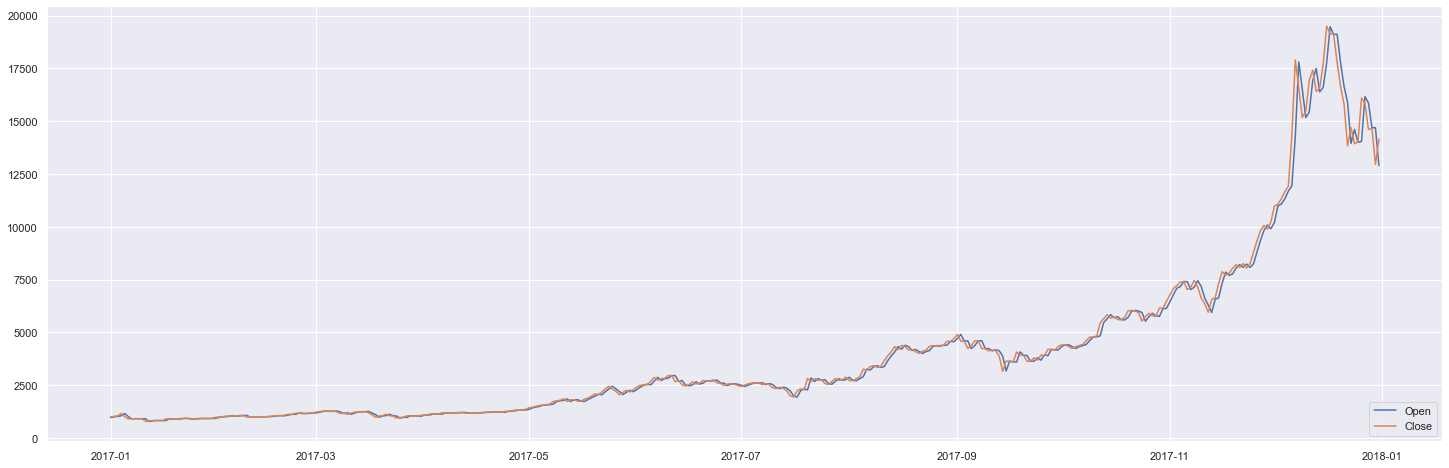

In [32]:
plt.plot(year2017['Date'],year2017[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

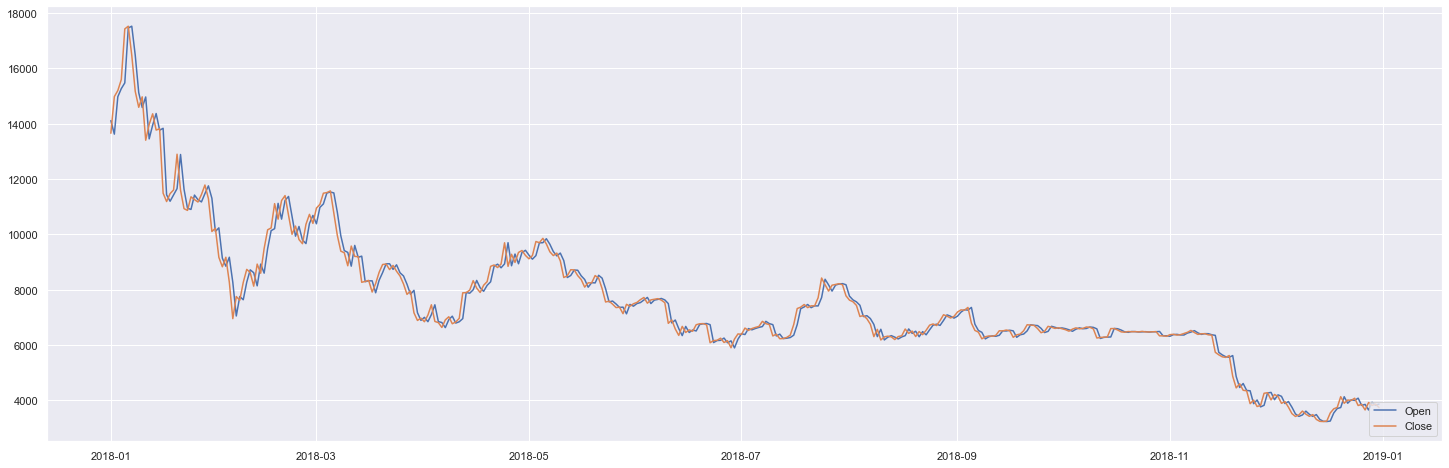

In [33]:
plt.plot(year2018['Date'],year2018[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

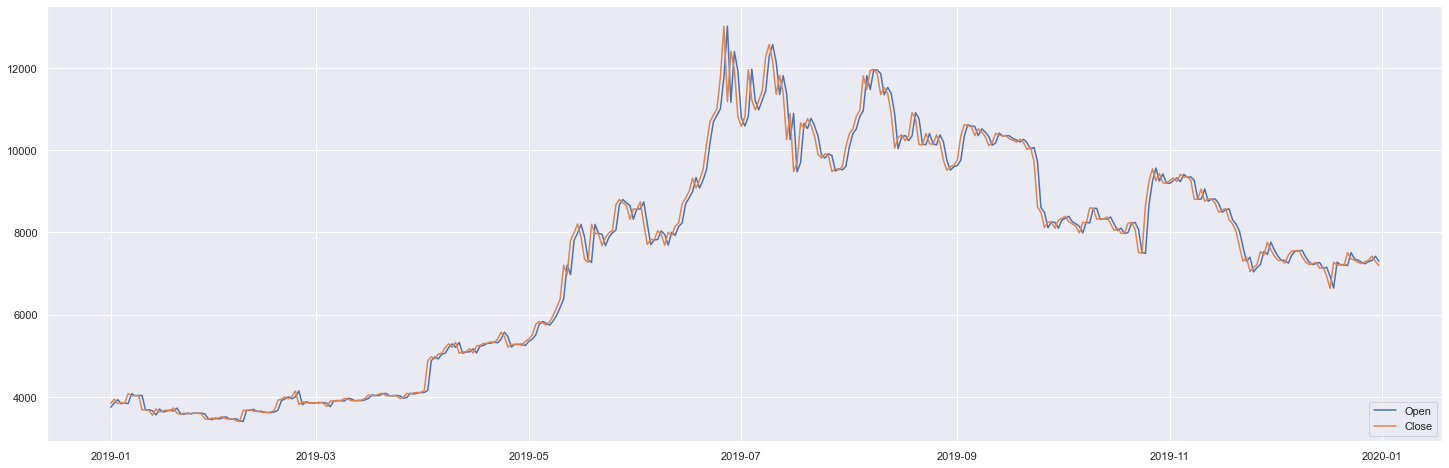

In [34]:
plt.plot(year2019['Date'],year2019[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

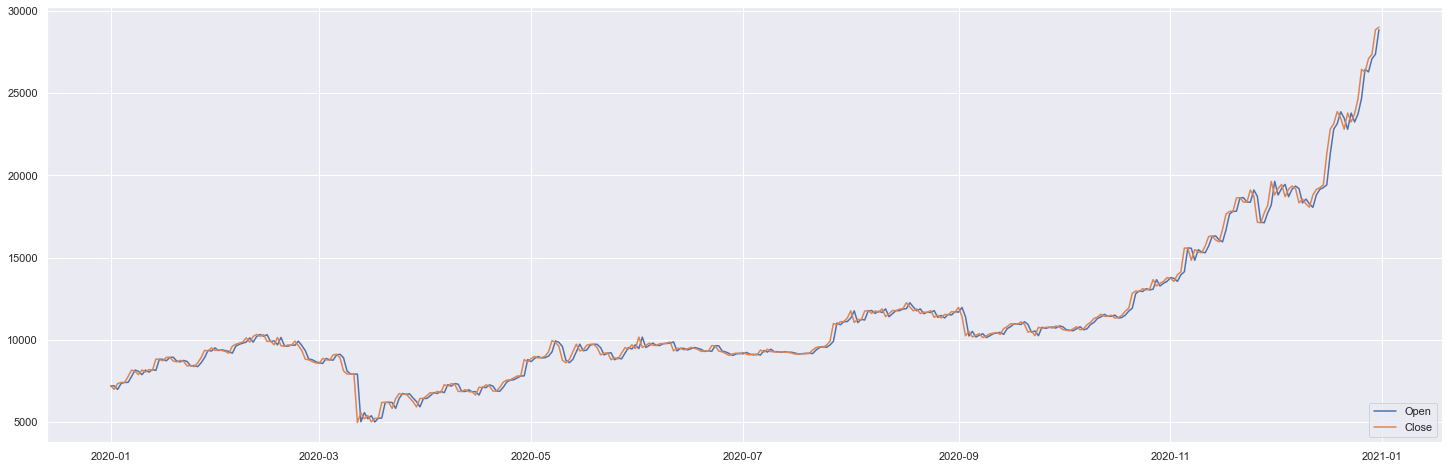

In [35]:
plt.plot(year2020['Date'],year2020[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

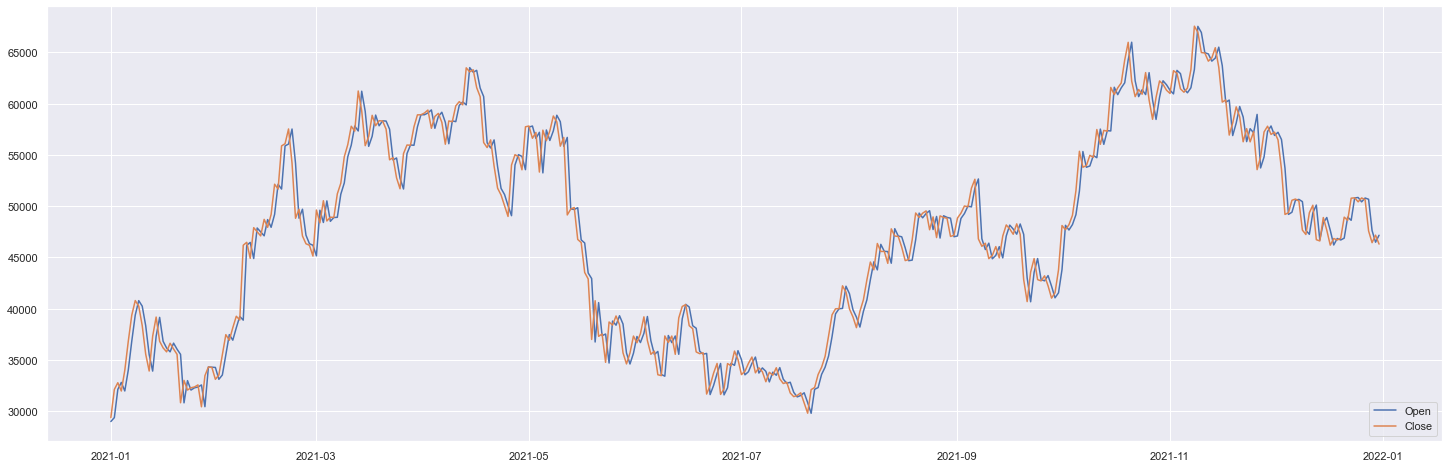

In [36]:
plt.plot(year2021['Date'],year2021[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

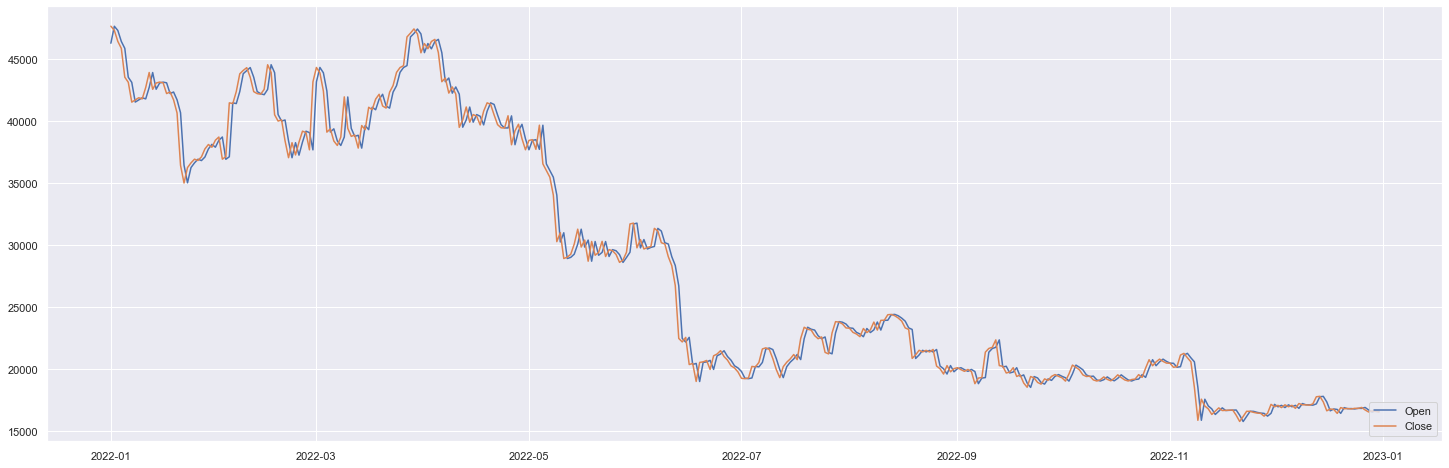

In [37]:
plt.plot(year2022['Date'],year2022[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

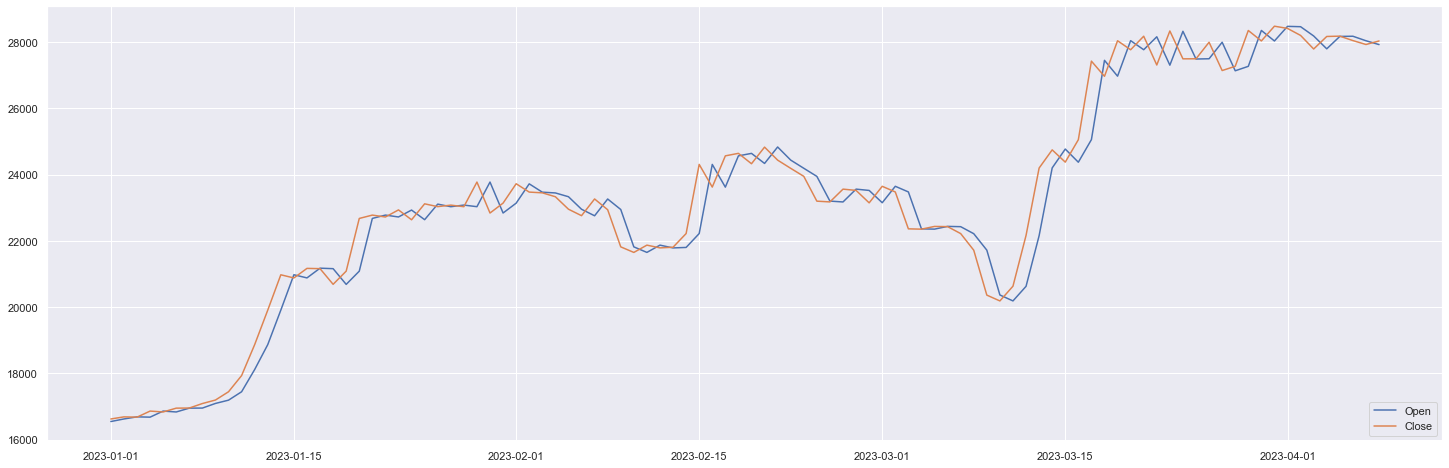

In [38]:
plt.plot(year2023['Date'],year2023[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [39]:
fig = go.Figure(data=[go.Candlestick(x=year2014['Date'],
                open=year2014['Open'],
                high=year2014['High'],
                low=year2014['Low'],
                close=year2014['Close'])])

fig.show()

In [40]:
fig = go.Figure(data=[go.Candlestick(x=year2016['Date'],
                open=year2016['Open'],
                high=year2016['High'],
                low=year2016['Low'],
                close=year2016['Close'])])

fig.show()

In [41]:
fig = go.Figure(data=[go.Candlestick(x=year2021['Date'],
                open=year2021['Open'],
                high=year2021['High'],
                low=year2021['Low'],
                close=year2021['Close'])])

fig.show()

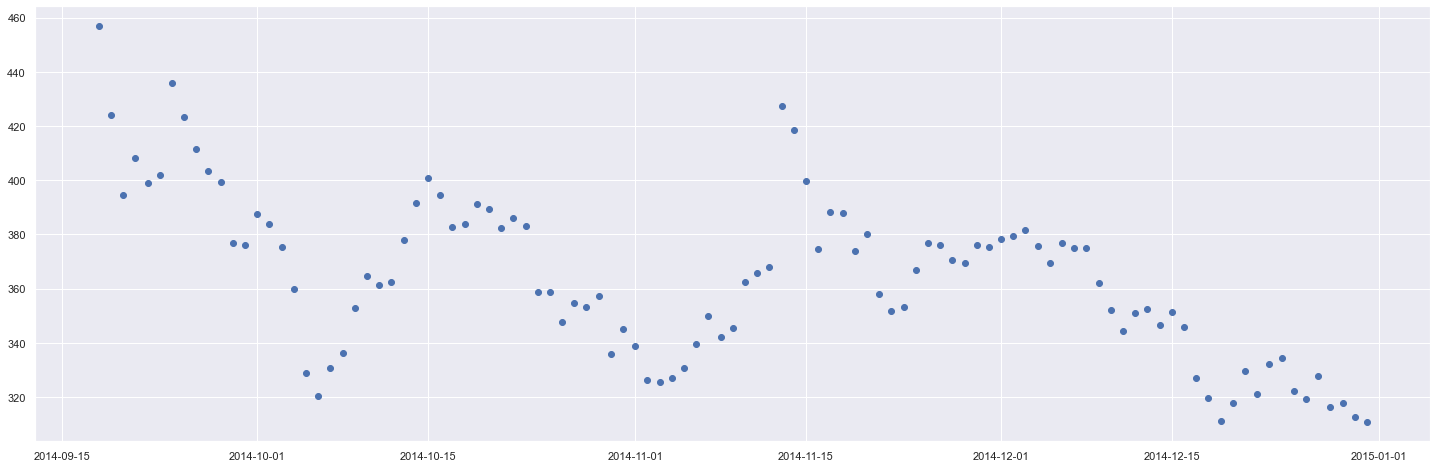

In [42]:
plt.scatter(year2014['Date'],year2014[['Open']])
plt.show()

<Axes: xlabel='Date', ylabel='Open'>

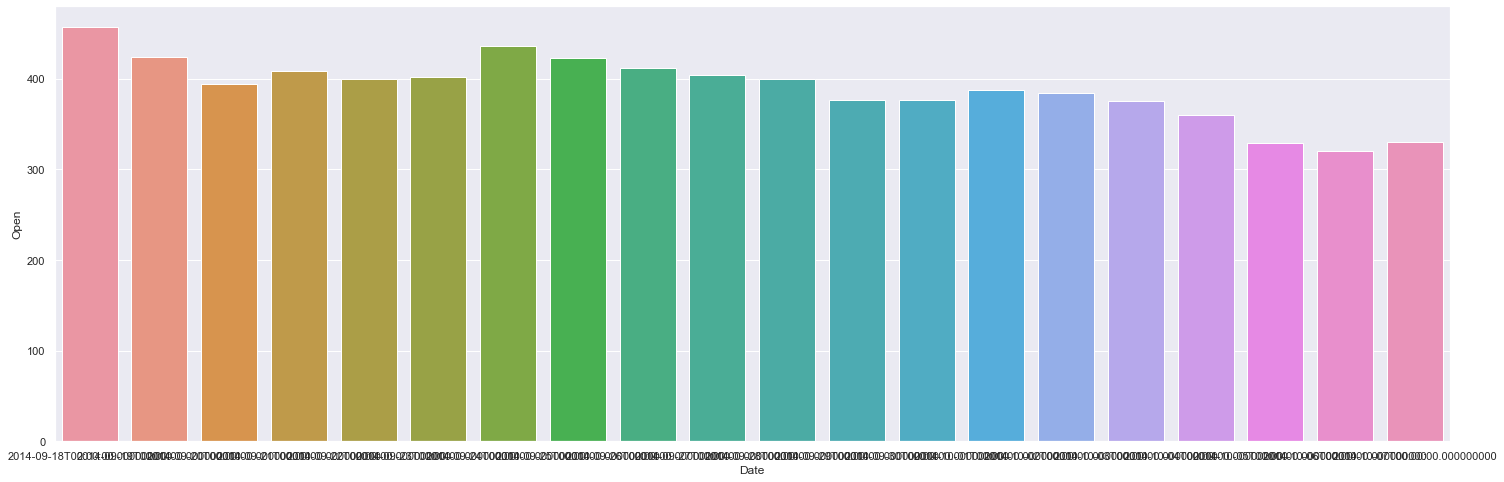

In [43]:
sns.barplot(x='Date',y='Open',data=year2014.head(20))

([<matplotlib.patches.Wedge at 0x23ed95287f0>,
 [Text(0.8490017864606322, 0.699425454631625, '2014-09-18 00:00:00'),
  Text(-0.4755771323200262, 0.9918802302769526, '2014-09-19 00:00:00'),
  Text(-1.093196016936706, -0.12215755626944025, '2014-09-20 00:00:00'),
  Text(-0.27074386343720963, -1.0661602883296177, '2014-09-21 00:00:00'),
  Text(0.9066395751403911, -0.6229002173616984, '2014-09-22 00:00:00')])

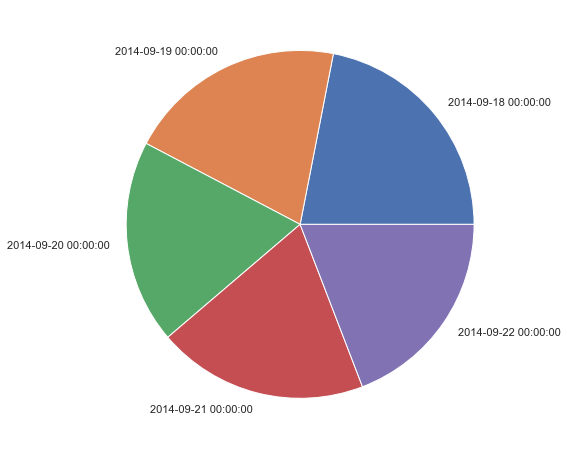

In [44]:
x=year2014['Open'].head()
plt.pie(x,labels=year2014['Date'].head())

## Applying the model 

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [46]:
poly=PolynomialFeatures(degree=3)

In [47]:
x = year2023['Open'].values.reshape(-1,1)
y = year2023['Close'].values.reshape(-1,1)

In [48]:
lm=LinearRegression()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1)

## Checking the Best Degree Which UnderFit On ML Model

In [50]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_test)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_test, y_val_pred))

In [51]:
min(validation_error)
list(range(maxdeg))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
training_error

[12337171.885694696,
 463375.2116964147,
 428056.2793683446,
 426137.701817005,
 432911.4762717658,
 494739.83364442934,
 769472.8519445955,
 1616664.008434323,
 3635444.0250070347,
 7538561.48383269]

In [53]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10
mnini_score=[]

# Loop through the degrees of the polynomial to create different models
for d in range(maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_test)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    mnini_score.append(lreg.score(x_poly_val,y_test))

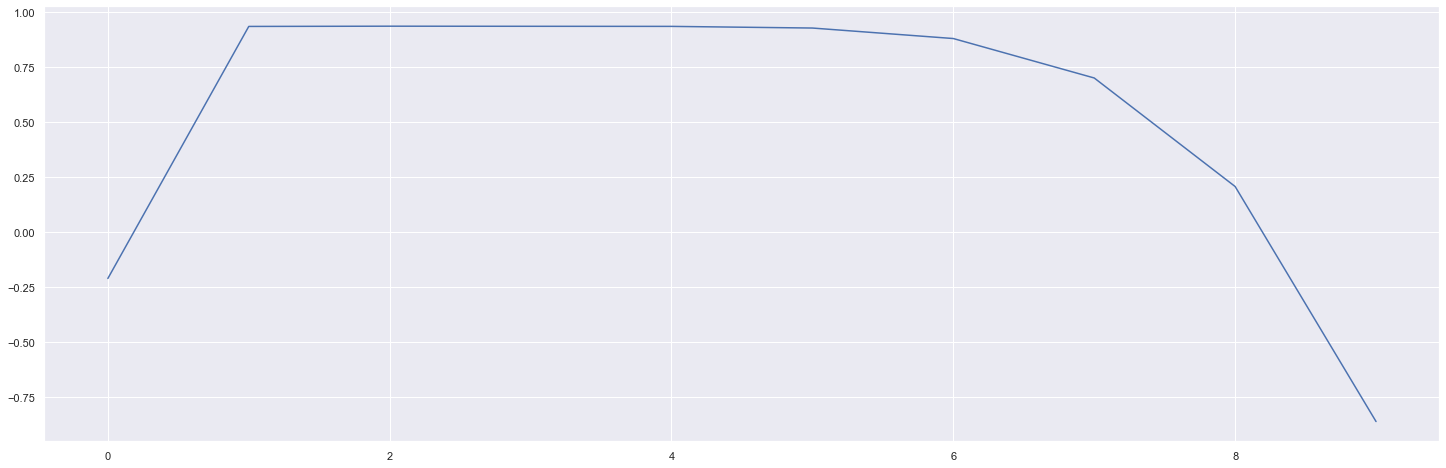

In [54]:
plt.plot(list(range(maxdeg)),mnini_score)
plt.show()

## Training the Model on the behalf of few months of data

In [55]:
poly_x=poly.fit_transform(x_train)
poly_x_test=poly.fit_transform(x_test)

In [56]:
fitting_data=lm.fit(poly_x,y_train)

In [57]:
predictive_close_value=fitting_data.predict(poly_x_test)
fitting_data.score(poly_x_test,y_test)

0.9360423174214363

In [58]:
year2023_close=year2023['Close'].tail(79)

In [59]:
a=predictive_close_value.reshape(1,-1)
b=y_test.reshape(1,-1)
predictive_vs_Actual=pd.DataFrame({'predictive_Value':a.flatten(),'actual_Value':year2023_close})

In [60]:
predictive_vs_Actual

predictive_Value  actual_Value
3046      28363.096536   22676.55273
3047      28276.555932   22777.62500
3048      23838.178364   22720.41602
3049      23778.866811   22934.43164
3050      27327.128342   22636.46875
...                ...           ...
3120      20381.772145   28168.08984
3121      20881.819533   28177.98438
3122      27711.554332   28044.14063
3123      21547.793640   27925.85938
3124      24480.810906   28032.18750

[79 rows x 2 columns]

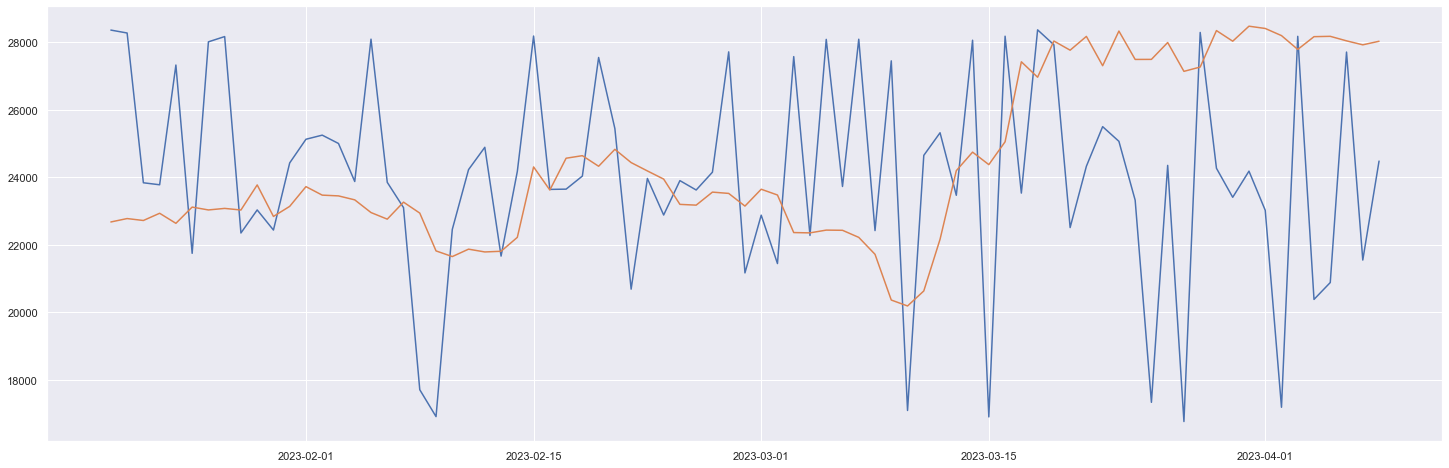

In [61]:
plt.plot(year2023['Date'].tail(79),predictive_vs_Actual[['predictive_Value','actual_Value']])
plt.show()

## Training and Test the data On behalf the data of 2022 year open prices
Single Linear regression

In [62]:
z=year2022[['Open']].values.reshape(-1,1)
y1=year2022['Close'].values.reshape(-1,1)
x2=year2023[['Open']].values.reshape(-1,1)
y2=year2023['Close'].values.reshape(-1,1)

In [63]:
poly_z=poly.fit_transform(z)
poly_x2=poly.fit_transform(x2)

In [64]:
lengthy=lm.fit(poly_z,y1)
lengthy.score(poly_x2,y2)

0.9573381748454958

In [65]:
al=lengthy.predict(poly_x2)

In [66]:
c=al.reshape(1,-1)
pre_al=pd.DataFrame({'Predict2023':c.flatten(),'Open2023':year2023['Open']})

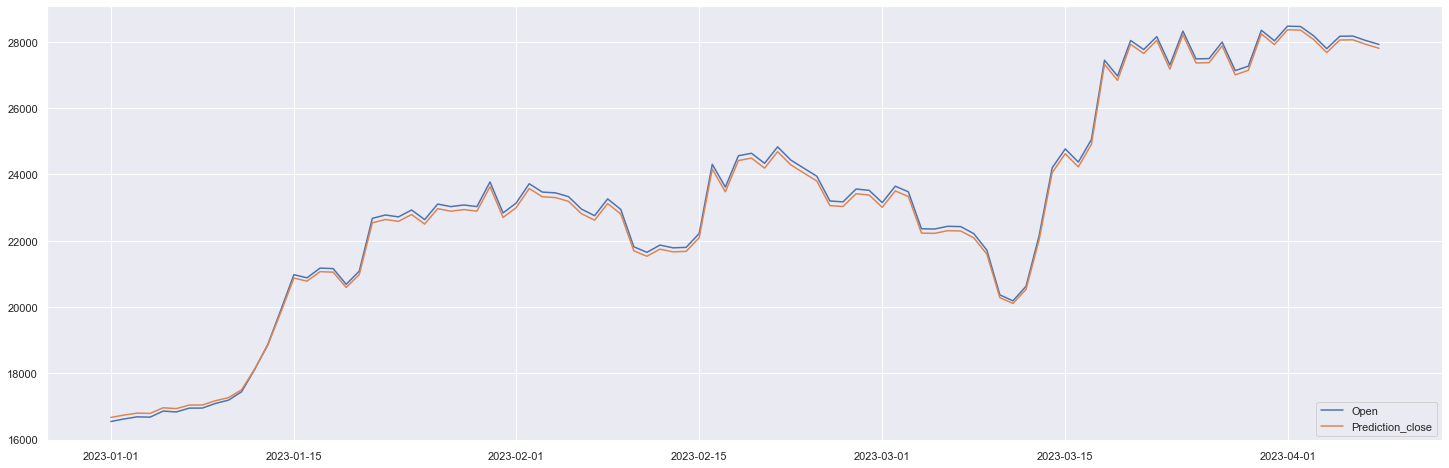

In [67]:
plt.plot(year2023["Date"],pre_al[['Open2023','Predict2023']])
plt.legend(["Open", "Prediction_close"], loc ="lower right")
plt.show()

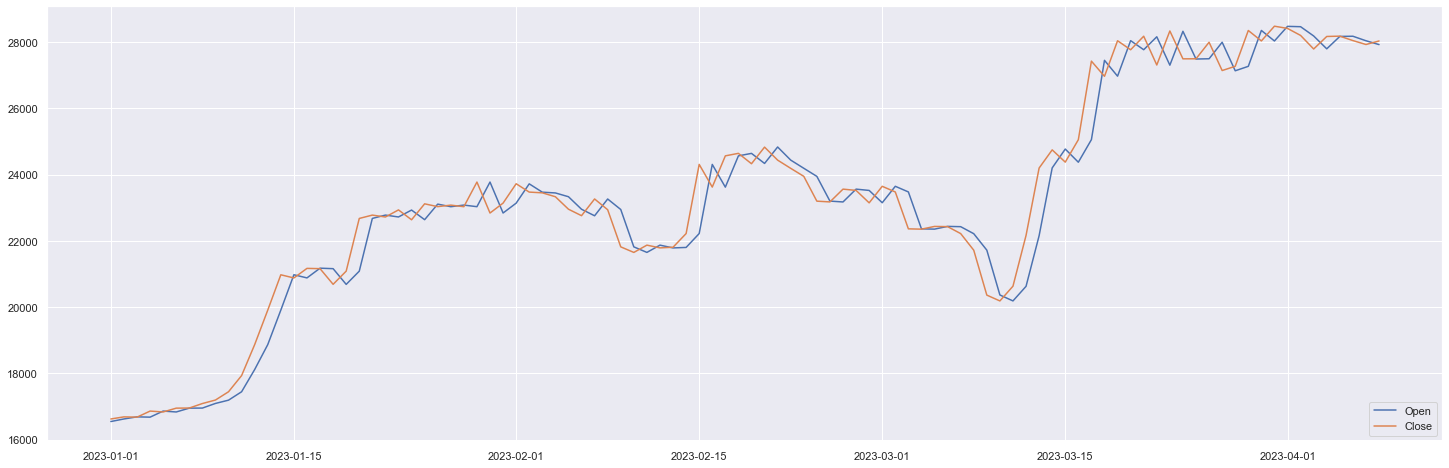

In [68]:
plt.plot(year2023["Date"],year2023[['Open','Close']])
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [69]:
year2023['Prediction']=pre_al['Predict2023']

C:\Users\Faraz\AppData\Local\Temp\ipykernel_1812\3468827639.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



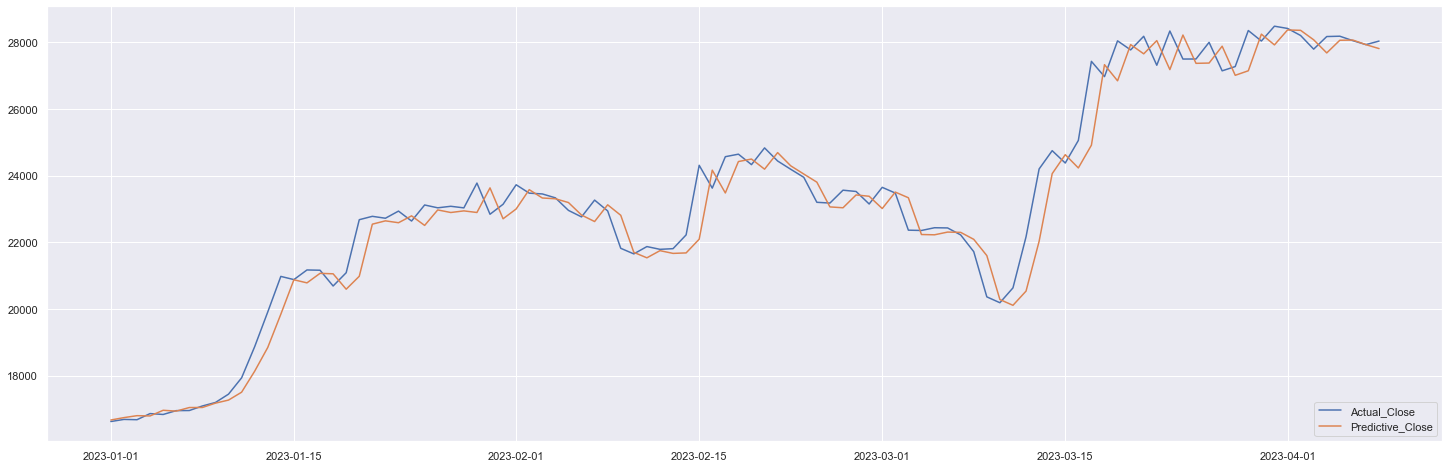

In [70]:
year2023[['Close','Prediction']]
plt.plot(year2023["Date"],year2023[['Close','Prediction']])
plt.legend(["Actual_Close","Predictive_Close"], loc ="lower right")
plt.show()

Multiple Linear regression 

In [71]:
mult_polyz=poly.fit_transform(year2022[['Open','High','Low']])
mult_polyx2=poly.fit_transform(year2023[['Open','High','Low']])

In [72]:
lengthy2=lm.fit(mult_polyz,y1)
lengthy2.score(mult_polyx2,y2)

0.9949660149562658

In [73]:
al=lengthy2.predict(mult_polyx2)

In [74]:
pre_reshape=al.reshape(1,-1)
pre_al2=pd.DataFrame({'Predictive2023':pre_reshape.flatten(),'Actual_Close':year2023['Close']})
pre_al2['Predictive2023'].shape

(98,)

In [75]:
year2023["Prediction_single"]=pre_al['Predict2023']
year2023["Prediction_multiple"]=pre_al2['Predictive2023']

C:\Users\Faraz\AppData\Local\Temp\ipykernel_1812\1016392122.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Faraz\AppData\Local\Temp\ipykernel_1812\1016392122.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
year2023.drop(columns=['Prediction'])

Date         Open         High          Low        Close  \
3027 2023-01-01  16547.91406  16630.43945  16521.23438  16625.08008   
3028 2023-01-02  16625.50977  16759.34375  16572.22852  16688.47070   
3029 2023-01-03  16688.84766  16760.44727  16622.37109  16679.85742   
3030 2023-01-04  16680.20508  16964.58594  16667.76367  16863.23828   
3031 2023-01-05  16863.47266  16884.02148  16790.28320  16836.73633   
...         ...          ...          ...          ...          ...   
3120 2023-04-04  27795.27344  28433.74219  27681.30469  28168.08984   
3121 2023-04-05  28169.72656  28739.23828  27843.76367  28177.98438   
3122 2023-04-06  28175.22656  28178.38477  27738.75977  28044.14063   
3123 2023-04-07  28038.96680  28111.59375  27794.03125  27925.85938   
3124 2023-04-08  27923.23438  28158.26953  27887.36523  28032.18750   

        Adj Close        Volume  Prediction_single  Prediction_multiple  
3027  16625.08008  9.244362e+09       16670.910396         16625.644491  
3028  16688.47070  1.209778e+10       16742.472244         16722.964237  
3029  16679.85742  1.390308e+10       16800.946565         16728.116099  
3030  16863.23828  1.842174e+10       16792.964377         16917.268550  
3031  16836.73633  1.369276e+10       16962.447089         16853.230812  
...           ...           ...                ...                  ...  
3120  28168.08984  1.528454e+10       27676.938136         28177.862388  
3121  28177.98438  1.705232e+10       28056.878089         28339.868365  
3122  28044.14063  1.383781e+10       28062.461103         27868.713461  
3123  27925.85938  1.086168e+10       27924.164641         27902.237661  
3124  28032.18750  9.243753e+09       27806.736174         28040.508641  

[98 rows x 9 columns]

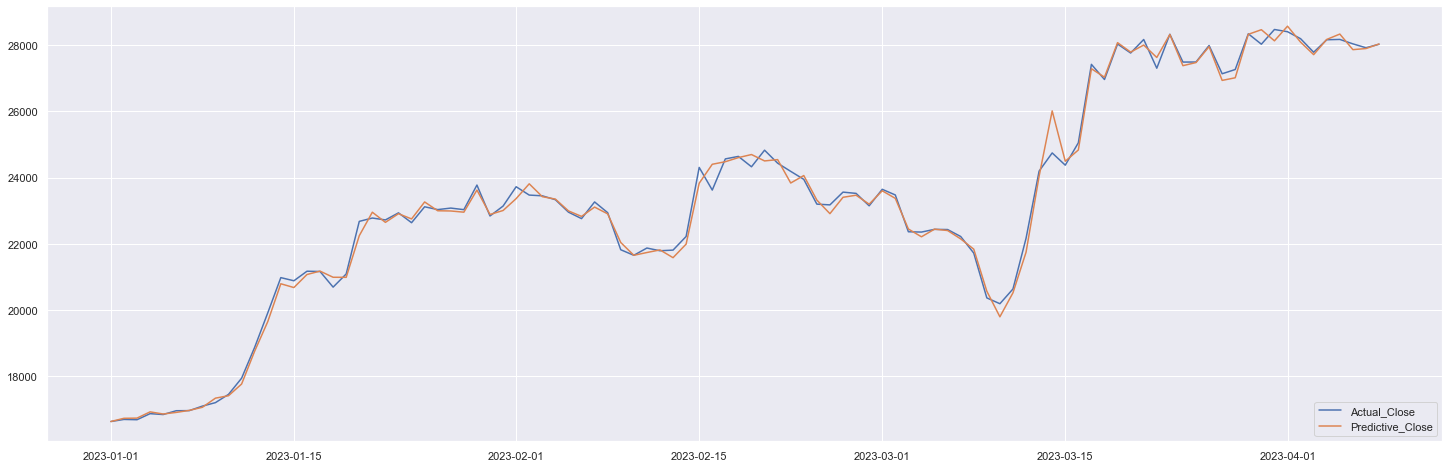

In [77]:
plt.plot(year2023["Date"],year2023[['Close','Prediction_multiple']])
plt.legend(["Actual_Close","Predictive_Close"], loc ="lower right")
plt.show()

In [78]:
pre_al2

Predictive2023  Actual_Close
3027    16625.644491   16625.08008
3028    16722.964237   16688.47070
3029    16728.116099   16679.85742
3030    16917.268550   16863.23828
3031    16853.230812   16836.73633
...              ...           ...
3120    28177.862388   28168.08984
3121    28339.868365   28177.98438
3122    27868.713461   28044.14063
3123    27902.237661   27925.85938
3124    28040.508641   28032.18750

[98 rows x 2 columns]

In [155]:
main=pd.DataFrame([[26853,27157,26724],[26351,26968,26328],[26351,26968,26328],[27102,27243,26692],[26748,27038,26551],[26849,27429,26818],[27222,27222,26114],[26328,26545,25964]],columns=['Open','High','Low'])

In [156]:
main2=poly.fit_transform(main[['Open','High','Low']])
CLosing_rate_21June=lengthy2.predict(main2)

In [157]:
CLosing_rate_21June

array([[26948.32787728],
       [26766.05831898],
       [26766.05831898],
       [26889.2980183 ],
       [26784.62598667],
       [27234.59375673],
       [26372.62077904],
       [26190.45634945]])